<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/matriz_confusion_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Primera vez que se importa la biblioteca de aprendizaje automático scikit-learn
# No te preocupes si esto parece mucho código
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import plot_confusion_matrix

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo/Semana2/titanic.csv'
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Transforma la columna Sexo en una forma que no sea de texto
# Elijo cuatro funciones, podrías haber elegido otras
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex']
# Convierta la columna Sexo en algo que pueda alimentar a un modelo
# Tiene
df['Sex'] = df.Sex.map({'male': 0, 
                                  'female': 1})
# Eliminar filas donde la edad es nan del conjunto de datos
df = df.loc[~df['Age'].isnull(), :]
# Crear matriz de características y vector objetivo
X = df.loc[:, feature_cols]
y = df['Survived']
# Divida los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)
# Estandarizar datos
scaler = StandardScaler()
# Ajusta solo en el conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar transformación tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Crea una instancia de un modelo
logreg = LogisticRegression()
# Entrena el modelo con los datos
logreg.fit(X_train, y_train);
# predicciones de clase (no probabilidades predichas)
predictions = logreg.predict(X_test)

In [6]:
cm = metrics.confusion_matrix(y_test.values, predictions)
cm

array([[87, 16],
       [17, 59]])

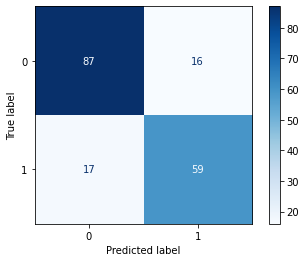

In [7]:

plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues');